## Malware detection

In [1]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib as plt
import seaborn as sns

from pandas_ml import ConfusionMatrix

from sklearn import svm
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,ExtraTreesClassifier 
from sklearn import preprocessing


In [2]:
!ls


Anomalies.xls  Classification.ipynb  readme file-3.doc


In [3]:
df = pd.read_excel("Anomalies.xls")
df.tail()


,DebugSize,IatRVA,ExportSize,ImageVersion,ResourceSize,VirtualSize2,NumberOfSections,malware name
5719,0,233472,29127,0,948,7112,8,Normal
5720,28,0,58340,501000,1064,1064,2,Normal
5721,28,74412,1242,501000,8624,32192,4,Normal
5722,28,22264,74,501000,1848,3408,4,Normal
5723,28,1093852,191,501000,205152,723,5,Normal


In [4]:
df['malware name'].unique()

array(['Adware', 'Backdoor', 'Trojan', 'Unknown', 'Ramsomeware',
       'Muldrop', 'Sdbot', 'Spam', 'Rbot', 'Normal'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5724 entries, 0 to 5723
Data columns (total 8 columns):
DebugSize           5724 non-null int64
IatRVA              5724 non-null int64
ExportSize          5724 non-null int64
ImageVersion        5724 non-null int64
ResourceSize        5724 non-null int64
VirtualSize2        5724 non-null int64
NumberOfSections    5724 non-null int64
malware name        5724 non-null object
dtypes: int64(7), object(1)
memory usage: 357.8+ KB


In [6]:
df.describe()

,DebugSize,IatRVA,ExportSize,ImageVersion,ResourceSize,VirtualSize2,NumberOfSections
count,5724.000000,5.724000e+03,5.724000e+03,5.724000e+03,5.724000e+03,5.724000e+03,5724.000000
mean,27.266247,1.178538e+05,9.862922e+05,9.427496e+06,2.804839e+05,2.098593e+04,4.009434
std,14.515570,2.308585e+05,3.040488e+07,1.390415e+08,6.717504e+06,9.404370e+04,1.101322
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,2.000000
25%,28.000000,1.236400e+04,0.000000e+00,5.010000e+05,1.032000e+03,7.320000e+02,3.000000
50%,28.000000,4.293200e+04,1.060000e+02,5.010000e+05,5.560000e+03,2.184000e+03,4.000000
75%,28.000000,1.215040e+05,2.720000e+02,5.010000e+05,3.481600e+04,1.144400e+04,4.000000
max,56.000000,2.719572e+06,9.395241e+08,2.152012e+09,2.073968e+08,1.737006e+06,11.000000


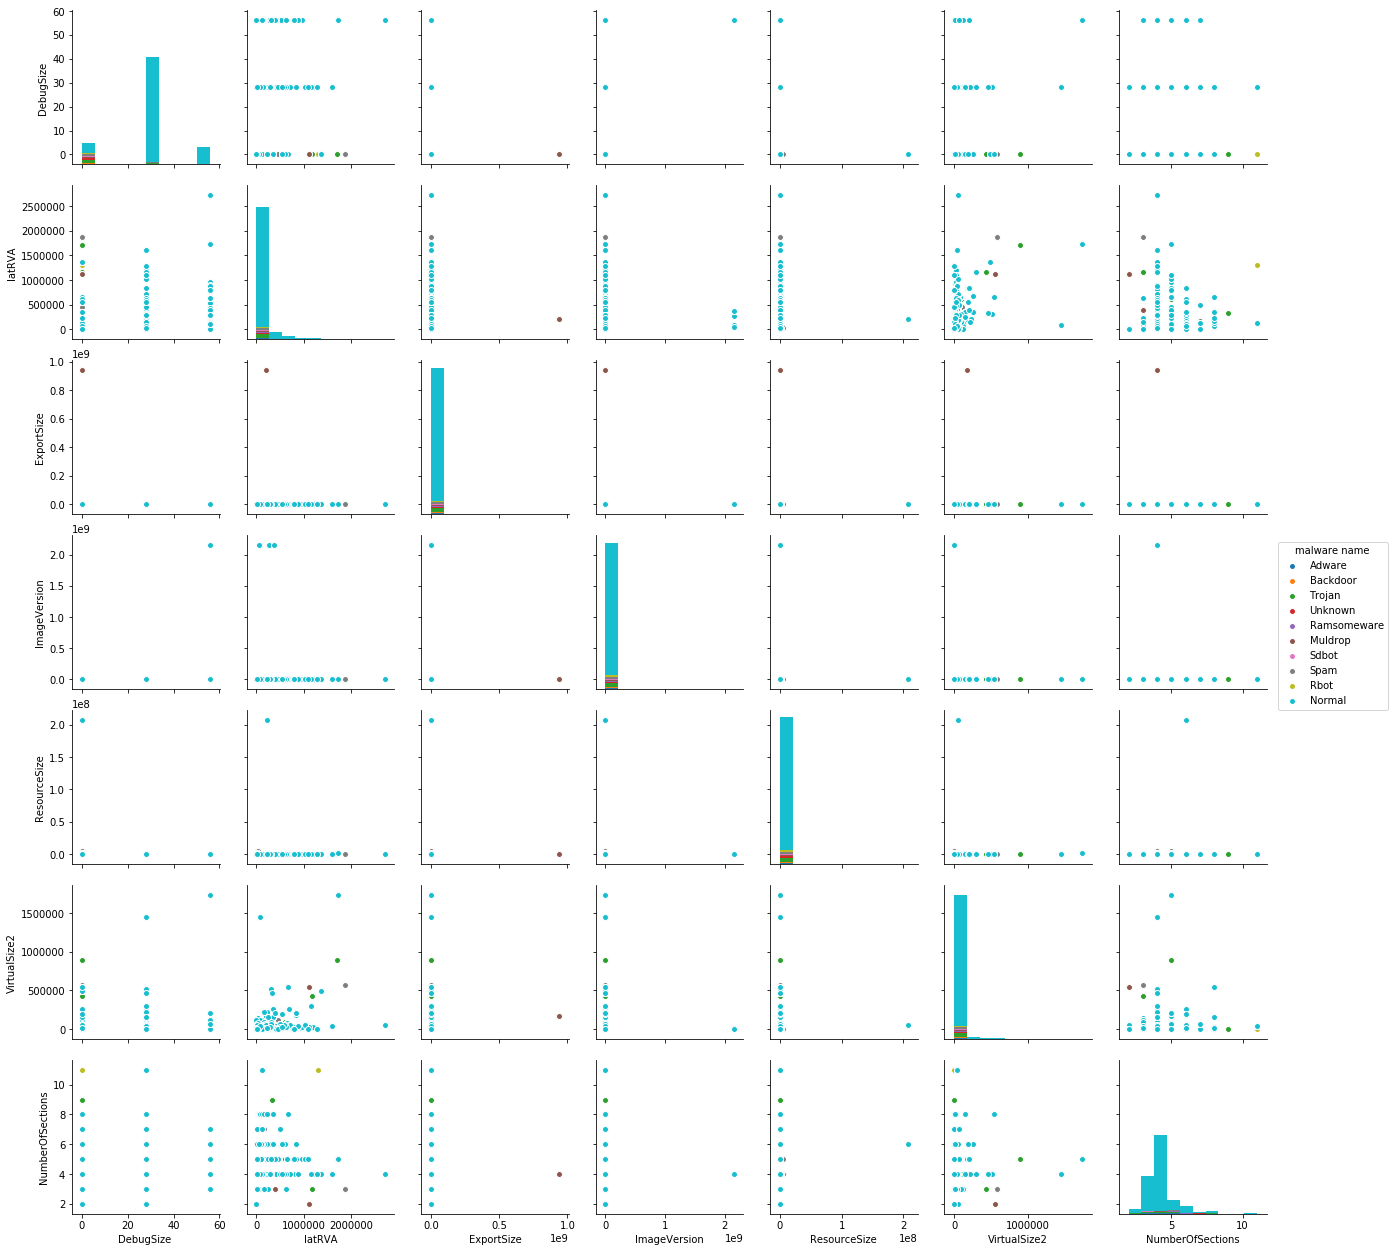

In [7]:
df1 = df.iloc[:,:7]
sns.pairplot(df.dropna(),vars=df1.columns,hue= 'malware name')

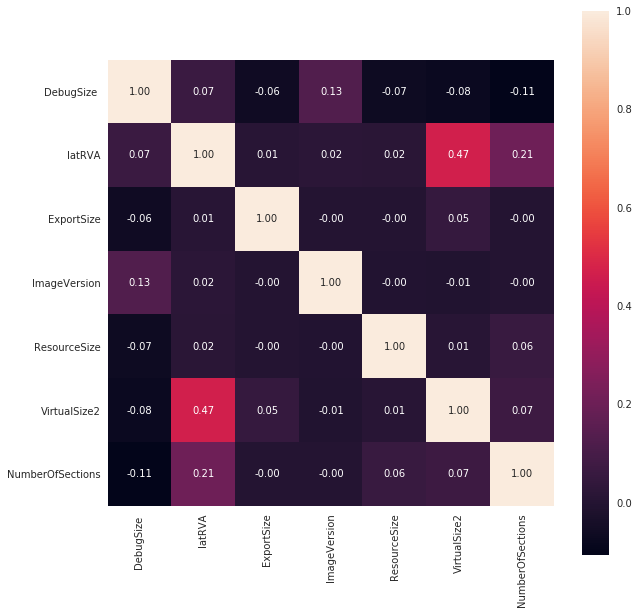

In [8]:
df1=df.iloc[:,:7]
col = df1.columns
cm = np.corrcoef(df1.values.T)
sns.set(font_scale=1.5)
sns.set(rc={'figure.figsize':(10,10)})
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 10},yticklabels=col,xticklabels=col)


In [9]:
from sklearn.cross_validation import train_test_split
y = df['malware name']
X = df.iloc[:,:7]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
y_train=np.array(y_train).reshape(-1,1)

/home/witcher/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
def models(X_train,X_test,y_train,y_test):
    names = ["Nearest Neighbors", "XGBoost","Decision Tree", "Random Forest","ExtraTreesClassifier","SVM"]
    classifiers = [KNeighborsClassifier(20),
                   xgb.XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=100),
                   DecisionTreeClassifier(max_depth=2),
                   RandomForestClassifier(max_depth=5, n_estimators=100,max_features=7),
                   ExtraTreesClassifier(max_depth=5,n_estimators=100,max_features=7),
                   svm.SVC(kernel='rbf')]
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(name+' Score:',score)
        prediction1 = clf.predict(X_test)
        np.set_printoptions(precision=2)
    return 1


In [11]:
models(X_train,X_test,y_train,y_test)

/home/witcher/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/home/witcher/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/witcher/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Nearest Neighbors Score: 0.9039580908032596


/home/witcher/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/witcher/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/witcher/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


XGBoost Score: 0.9243306169965075
Decision Tree Score: 0.9022118742724098
Random Forest Score: 0.9179278230500582
ExtraTreesClassifier Score: 0.9086146682188592


/home/witcher/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/home/witcher/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Score: 0.9254947613504074


1

## As the dataset is biased we remove the bias clss and tried classifying the malware as either 'Adware', 'Backdoor', 'Trojan', 'Unknown', 'Ransomeware','Muldrop', 'Sdbot', 'Spam', 'Rbot'

In [12]:
df_set =df.loc[df['malware name'].isin(['Adware', 'Backdoor', 'Trojan', 'Unknown', 'Ramsomeware',
       'Muldrop', 'Sdbot', 'Spam', 'Rbot'])]

In [13]:
df_set.head()

,DebugSize,IatRVA,ExportSize,ImageVersion,ResourceSize,VirtualSize2,NumberOfSections,malware name
0,0,5976,0,0,68280,69632,2,Adware
1,0,16860,0,0,0,2812,3,Adware
2,28,610192,0,0,17734,89864,5,Adware
3,28,35312,0,0,9096,3810,4,Adware
4,0,147932,0,0,476,65536,3,Adware


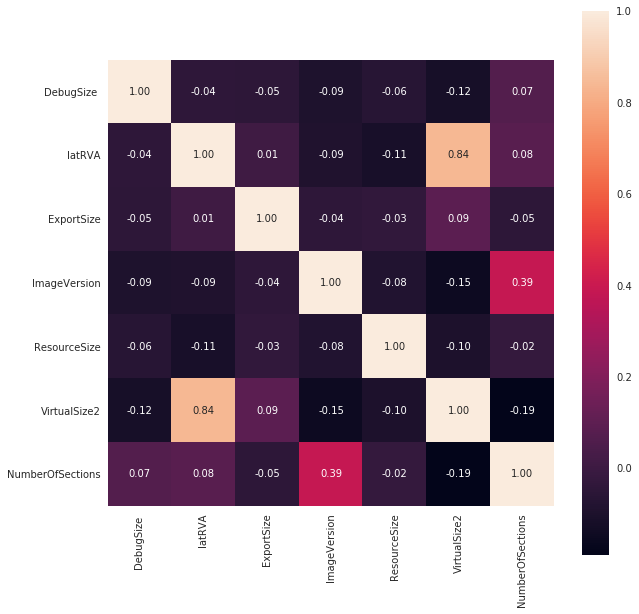

In [14]:
df1_set=df_set.iloc[:,:7]
col_set = df1_set.columns
cm = np.corrcoef(df1_set.values.T)
sns.set(font_scale=1.5)
sns.set(rc={'figure.figsize':(10,10)})
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 10},yticklabels=col,xticklabels=col)


In [15]:
df_set.shape

(540, 8)

In [16]:
y_set = df_set['malware name']
X_set = df_set.iloc[:,:7]
X_train_set,X_test_set,y_train_set,y_test_set = train_test_split(X_set,y_set,test_size=0.3)
y_train_set=np.array(y_train_set).reshape(-1,1)

In [17]:
models(X_train_set,X_test_set,y_train_set,y_test_set)

/home/witcher/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/home/witcher/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/witcher/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/witcher/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False

Nearest Neighbors Score: 0.29012345679012347
XGBoost Score: 0.2962962962962963
Decision Tree Score: 0.2839506172839506
Random Forest Score: 0.30864197530864196
ExtraTreesClassifier Score: 0.2345679012345679
SVM Score: 0.29012345679012347


/home/witcher/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/home/witcher/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1